In [4]:
# %load LinRegLearner.py
"""
A simple wrapper for linear regression.  (c) 2015 Tucker Balch
"""

import numpy as np

class LinRegLearner(object):

    def __init__(self, verbose = False):
        pass # move along, these aren't the drones you're looking for

    def addEvidence(self,dataX,dataY):
        """
        @summary: Add training data to learner
        @param dataX: X values of data to add
        @param dataY: the Y training values
        """

        # slap on 1s column so linear regression finds a constant term
        newdataX = np.ones([dataX.shape[0],dataX.shape[1]+1])
        newdataX[:,0:dataX.shape[1]]=dataX

        # build and save the model
        self.model_coefs, residuals, rank, s = np.linalg.lstsq(newdataX, dataY)
        
    def query(self,points):
        """
        @summary: Estimate a set of test points given the model we built.
        @param points: should be a numpy array with each row corresponding to a specific query.
        @returns the estimated values according to the saved model.
        """
        return (self.model_coefs[:-1] * points).sum(axis = 1) + self.model_coefs[-1]

if __name__=="__main__":
    print "the secret clue is 'zzyzx'"


the secret clue is 'zzyzx'


In [ ]:
# %load testlearner.py
"""
Test a learner.  (c) 2015 Tucker Balch
"""

import numpy as np
import math
import LinRegLearner as lrl

if __name__=="__main__":
    inf = open('Data/ripple.csv')
    data = np.array([map(float,s.strip().split(',')) for s in inf.readlines()])

    # compute how much of the data is training and testing
    train_rows = math.floor(0.6* data.shape[0])
    test_rows = data.shape[0] - train_rows

    # separate out training and testing data
    trainX = data[:train_rows,0:-1]
    trainY = data[:train_rows,-1]
    testX = data[train_rows:,0:-1]
    testY = data[train_rows:,-1]

    print testX.shape
    print testY.shape

    # create a learner and train it
    learner = lrl.LinRegLearner(verbose = True) # create a LinRegLearner
    learner.addEvidence(trainX, trainY) # train it

    # evaluate in sample
    predY = learner.query(trainX) # get the predictions
    rmse = math.sqrt(((trainY - predY) ** 2).sum()/trainY.shape[0])
    print
    print "In sample results"
    print "RMSE: ", rmse
    c = np.corrcoef(predY, y=trainY)
    print "corr: ", c[0,1]

    # evaluate out of sample
    predY = learner.query(testX) # get the predictions
    rmse = math.sqrt(((testY - predY) ** 2).sum()/testY.shape[0])
    print
    print "Out of sample results"
    print "RMSE: ", rmse
    c = np.corrcoef(predY, y=testY)
    print "corr: ", c[0,1]

    #learners = []
    #for i in range(0,10):
        #kwargs = {"k":i}
        #learners.append(lrl.LinRegLearner(**kwargs))


In [7]:
 dict(a='6',b='7')

{'a': '6', 'b': '7'}

In [13]:
a = np.random.random((5,5))

In [14]:
a

array([[ 0.60096922,  0.52337591,  0.91874355,  0.76102785,  0.56455702],
       [ 0.63086049,  0.88606088,  0.61661155,  0.2624461 ,  0.24583625],
       [ 0.01973378,  0.2772443 ,  0.62400951,  0.73075216,  0.45881075],
       [ 0.22760621,  0.44380852,  0.84897319,  0.41005337,  0.14408671],
       [ 0.4859172 ,  0.44626881,  0.02020651,  0.61070284,  0.61850924]])

In [16]:
a.mean(axis = 0)

array([ 0.39301738,  0.51535169,  0.60570886,  0.55499646,  0.40635999])

In [18]:
np.random.randn(100)*5

array([  5.85895073,  -3.8183966 ,   6.329727  ,  -6.98604677,
        -6.14053172,   2.36659603,   3.86668298,   1.733075  ,
        -0.09228146,  -2.45260826,   4.22871329,   5.80890507,
         7.53110918,  -7.6109338 ,  -2.12253727,   4.56736187,
         2.35359602,   3.38778883,  -2.2724162 ,  -8.9061816 ,
        -0.68216519,  -4.80531501,  -5.66226691,  -5.00461601,
        -0.32589687,   0.73597768,  -7.34531348,   3.39512039,
        -5.27172539,  -1.12524847,   0.37580551,  -5.23132544,
         4.44999466,  -6.37832277,  -7.67411802,  -0.79947696,
         1.32454129,   2.86676807,   2.1174278 ,  -5.0071728 ,
        -4.11866313,   4.51180757,   1.37091041,  -0.17085355,
        -2.60851525,   6.53724333,   7.02397721,  -4.57015299,
         0.90318312,  -0.23179443,  -8.51018714,  -1.73397673,
        -1.3773961 , -10.67278314,  -3.81447756,  -7.48950398,
         3.05657174,   2.59006565,  -7.34350663,   0.89428649,
         2.74328734,  -2.91800882,   0.17205785,   0.83

In [22]:
v = np.array([1,2,3])
p = np.array([0.2,0.5,0.3])
bins = np.cumsum(p)
print bins

[ 0.2  0.7  1. ]


In [23]:
help(np.random.random_sample)

Help on built-in function random_sample:

random_sample(...)
    random_sample(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0).
    
    Results are from the "continuous uniform" distribution over the
    stated interval.  To sample :math:`Unif[a, b), b > a` multiply
    the output of `random_sample` by `(b-a)` and add `a`::
    
      (b - a) * random_sample() + a
    
    Parameters
    ----------
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    
    Returns
    -------
    out : float or ndarray of floats
        Array of random floats of shape `size` (unless ``size=None``, in which
        case a single float is returned).
    
    Examples
    --------
    >>> np.random.random_sample()
    0.47108547995356098
    >>> type(np.random.random_sample())
    <type 'float'>
    >>> n

In [25]:
np.power(0.64,0.5)

0.80000000000000004

In [29]:
np.ones(5, dtype = 'int')

array([1, 1, 1, 1, 1])

In [1]:
np.power(0.6,[0.5, 0.8, 1, 2.0])

array([ 0.77459667,  0.66453981,  0.6       ,  0.36      ])

In [2]:
help(np.meshgrid)

Help on function meshgrid in module numpy.lib.function_base:

meshgrid(*xi, **kwargs)
    Return coordinate matrices from coordinate vectors.
    
    Make N-D coordinate arrays for vectorized evaluations of
    N-D scalar/vector fields over N-D grids, given
    one-dimensional coordinate arrays x1, x2,..., xn.
    
    .. versionchanged:: 1.9
       1-D and 0-D cases are allowed.
    
    Parameters
    ----------
    x1, x2,..., xn : array_like
        1-D arrays representing the coordinates of a grid.
    indexing : {'xy', 'ij'}, optional
        Cartesian ('xy', default) or matrix ('ij') indexing of output.
        See Notes for more details.
    
        .. versionadded:: 1.7.0
    sparse : bool, optional
        If True a sparse grid is returned in order to conserve memory.
        Default is False.
    
        .. versionadded:: 1.7.0
    copy : bool, optional
        If False, a view into the original arrays are returned in order to
        conserve memory.  Default is True.  P

In [4]:
%matplotlib inline
from mpl_toolkits.mplot3d import *
import matplotlib.pyplot as plt
import numpy as np
from random import random, seed
from matplotlib import cm

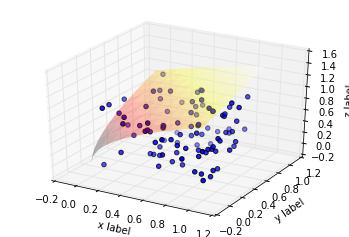

In [10]:
plt.clf()
fig = plt.figure()
ax = fig.gca(projection='3d')               # to work in 3d
plt.hold(True)
x_surf=np.arange(0, 1, 0.01)                # generate a mesh
y_surf=np.arange(0, 1, 0.01)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = np.sqrt(x_surf+y_surf)             # ex. function, which depends on x and y
ax.plot_surface(x_surf, y_surf, z_surf, alpha = 0.3, linewidth=0, cmap=cm.hot);    # plot a 3d surface plot

n = 100
seed(0)                                     # seed let us to have a reproducible set of random numbers
x=[random() for i in range(n)]              # generate n random points
y=[random() for i in range(n)]
z=[random() for i in range(n)]
ax.scatter(x, y, z);                        # plot a 3d scatter plot

ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_zlabel('z label')

plt.show()

In [6]:
help(ax.plot_surface)

Help on method plot_surface in module mpl_toolkits.mplot3d.axes3d:

plot_surface(self, X, Y, Z, *args, **kwargs) method of matplotlib.axes._subplots.Axes3DSubplot instance
    Create a surface plot.
    
    By default it will be colored in shades of a solid color,
    but it also supports color mapping by supplying the *cmap*
    argument.
    
    The `rstride` and `cstride` kwargs set the stride used to
    sample the input data to generate the graph.  If 1k by 1k
    arrays are passed in the default values for the strides will
    result in a 100x100 grid being plotted.
    
    ============= ================================================
    Argument      Description
    ============= ================================================
    *X*, *Y*, *Z* Data values as 2D arrays
    *rstride*     Array row stride (step size), defaults to 10
    *cstride*     Array column stride (step size), defaults to 10
    *color*       Color of the surface patches
    *cmap*        A colormap fo

In [23]:
# %load best4knn.py
import numpy as np
def data_gen(num = 2000):
    X1 = np.random.random((num/2,2)) * 10 
    Y1 = np.array([np.zeros(num/2)]).T
    X2 = np.random.random((num/2,2)) * 10  + np.array([10,10])
    Y2 = np.array([np.zeros(num/2)]).T + 100
    X = np.concatenate((X1,X2),axis = 0)
    Y = np.concatenate((Y1,Y2),axis = 0)
    return np.concatenate((X,Y),axis = 1)

data = data_gen()
dataX = data[:,:-1]
dataY = data[:,-1]
newdataX = np.ones([dataX.shape[0],dataX.shape[1]+1])
newdataX[:,0:dataX.shape[1]]=dataX
coefs, residuals, rank, s =\
np.linalg.lstsq(newdataX, dataY)
print coefs

[  4.31994654   4.19756178 -34.85887654]


In [24]:
newdataX

array([[  3.39958383,   6.86495265,   1.        ],
       [  0.79967832,   7.89486584,   1.        ],
       [  2.74382946,   7.34088316,   1.        ],
       ..., 
       [ 15.85960369,  13.72577419,   1.        ],
       [ 10.18552177,  19.44921569,   1.        ],
       [ 18.12429286,  13.72548821,   1.        ]])

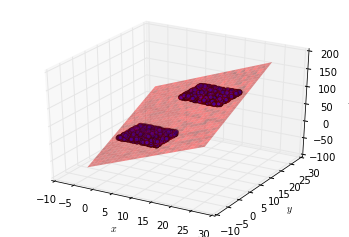

In [26]:
plt.clf()
a, b, c = coefs
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.scatter(data[:,0], data[:,1], data[:,2]) 
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

x_surf = np.arange(-5, 25, 0.1)
y_surf = np.arange(-5, 25, 0.1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = a*x_surf + b*y_surf + c
ax.plot_surface(x_surf,y_surf,z_surf, alpha = 0.45, linewidth=0, color = 'red')
plt.show()
plt.savefig('b4k.png', bbox_inches='tight')